# Multiperceptrón

---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [10]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Carga de Datos

In [52]:
import pandas as pd      # para trabajar con archivos de datos csv, excel
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

nombre_archivo = DATOS_DIR + 'rgb_colores.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
# %% Carga de dataset con formato R, G, B, Color
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

df

,R,G,B,Color
0,20,139,240,Azul
1,174,83,72,Marron
2,144,249,131,Verde
3,168,25,156,Rosa
4,30,182,136,Verde
...,...,...,...,...
5047,26,26,26,Negro
5048,27,27,27,Negro
5049,28,28,28,Negro
5050,29,29,29,Negro


### Selección de Atributos Independientes y Target. Gráfico del Espacio

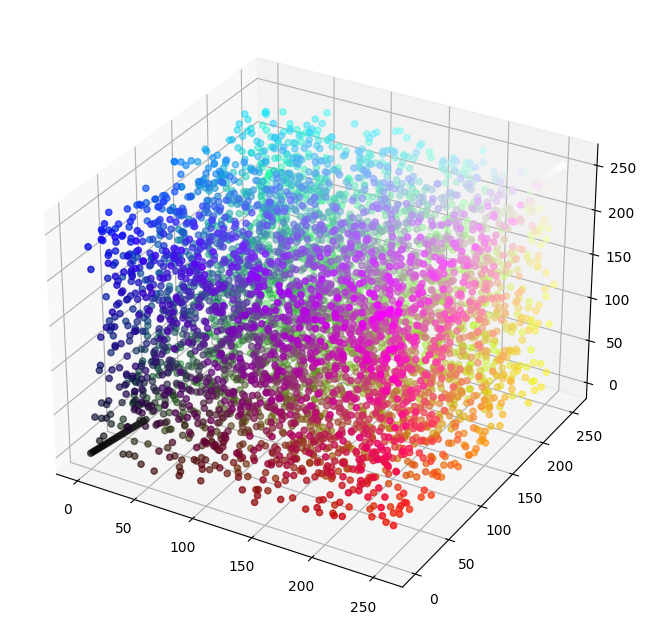

In [53]:
# dibuja puntos en el espacio. utiliza posición RGB para posicionar y pintar
R = np.array(df.iloc[:,0])
G = np.array(df.iloc[:,1])
B = np.array(df.iloc[:,2])
C = np.array(df.iloc[:,0:-1])
Nombre = df.iloc[:,-1]

# prepara gráficos de todos los puntos
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')

ax.scatter(R, G, B, c = C/255.0)

# %% Preprocesamiento de datos para el entrenamiento

binarizer = preprocessing.LabelBinarizer()
scaler = preprocessing.MinMaxScaler()


Y_bin = binarizer.fit_transform(Nombre)
X_raw = np.array(C)

X = scaler.fit_transform( X_raw )
Y = np.array(Y_bin.tolist())


In [56]:
import plotly.express as px

# Eliminar aleatoriamente elementos del DataFrame para dibujar mas rapido
df_graf = df.sample(frac=0.15, random_state=1)  # Mantener % de las filas

# Agrega la columna 'RGB' al DataFrame df_graf
df_graf['RGB']= df_graf.apply(lambda row: f'#{row["R"]:02x}{row["G"]:02x}{row["B"]:02x}', axis=1)

# Gráfica ejemplos según propiedades en 3D
# Gráfica ejemplos según propiedades en 3D
fig = px.scatter_3d(
    df_graf,
    x='R',
    y='G',
    z='B',
    color='RGB',
    title='Colores en 3D',
    color_discrete_map={color: color for color in df_graf['RGB']},
    hover_data=['Color']  # Añadir 'nombre' al hover
)

#fig.update_traces(marker=dict(size=8))

fig.show()

df_graf

,R,G,B,Color,RGB
3472,188,210,145,Amarillo,#bcd291
2860,66,184,240,Azul,#42b8f0
1796,198,137,245,Violeta,#c689f5
4021,157,224,184,Verde,#9de0b8
1675,252,11,175,Rosa,#fc0baf
...,...,...,...,...,...
3483,142,99,153,Violeta,#8e6399
4614,58,233,197,Verde,#3ae9c5
13,180,134,41,Marron,#b48629
1953,84,56,104,Violeta,#543868


In [47]:
import numpy as np
import pandas as pd
import plotly.express as px

# Ejemplo de DataFrame
df1 = pd.DataFrame({
    'R': [255, 0, 0, 128, 64, 192, 32, 16, 255, 128],
    'G': [0, 255, 0, 128, 64, 192, 32, 255, 16, 128],
    'B': [0, 0, 255, 128, 64, 192, 255, 32, 16, 128],
    'Nombre': ['Red', 'Green', 'Blue', 'Gray', 'Olive', 'Silver', 'Teal', 'Navy', 'Maroon', 'Purple']
})

# Eliminar aleatoriamente el 90% de los elementos del DataFrame
df_graf = df1.sample(frac=0.1, random_state=1)  # Mantener el 10% de las filas

# Función para convertir los valores RGB a formato hexadecimal
def rgb_to_hex(r, g, b):
    return f'#{r:02x}{g:02x}{b:02x}'

# Agrega la columna 'RGB' al DataFrame df_graf
df_graf['RGB'] = df_graf.apply(lambda row: rgb_to_hex(row['R'], row['G'], row['B']), axis=1)

# Para asegurarnos que Plotly utilice los colores correctos, usamos 'color_discrete_sequence'
color_map = {name: rgb_to_hex(row['R'], row['G'], row['B']) for name, row in df_graf.iterrows()}

# Gráfica ejemplos según propiedades en 3D
fig = px.scatter_3d(df_graf, x="R", y="G", z="B", color='Nombre',
                    title='Colores en 3D',
                    color_discrete_map=color_map)

# Ajuste para mostrar información emergente
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))

# Ajustar el ancho de la figura y centrar el título
fig.update_layout(
    width=800,  # Ajusta el ancho de la figura
    title={
        'text': 'Colores en 3D',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Mostrar la figura
fig.show()


### Generación y Evaluación del Modelo

In [14]:
FunH = 'tanh'   # identity logistic tanh relu
ocultas = (30, 20, 20)

alfa = 0.001
MAX_ITE = 1300

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=0.0001,
                       verbose=False).fit(X, Y)


Y_pred = modelo.predict(X)
score = modelo.score(X, Y)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y)
Y_pred_it = binarizer.inverse_transform(Y_pred)

print(Y,'\n')
print(Y_it)


[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

['Azul' 'Marron' 'Verde' ... 'Negro' 'Negro' 'Negro']


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.



Efectividad:  85.55%
      Score:   0.85%


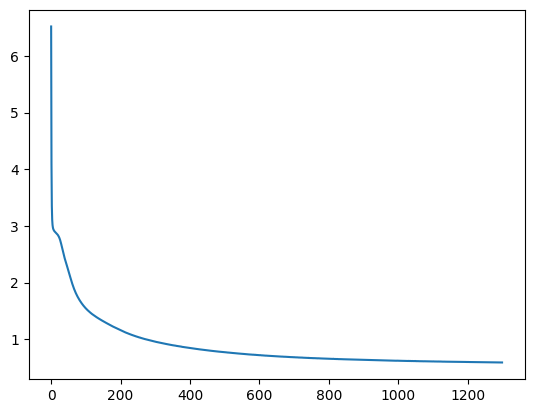

In [15]:
# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )


plt.plot(modelo.loss_curve_)


El color con componentes RGB = (240,0,200) es Rosa

El color con componentes RGB = (100,100,200) es Azul

El color con componentes RGB = (161,120,110) es Marron

El color con componentes RGB = (10,200,50) es Verde


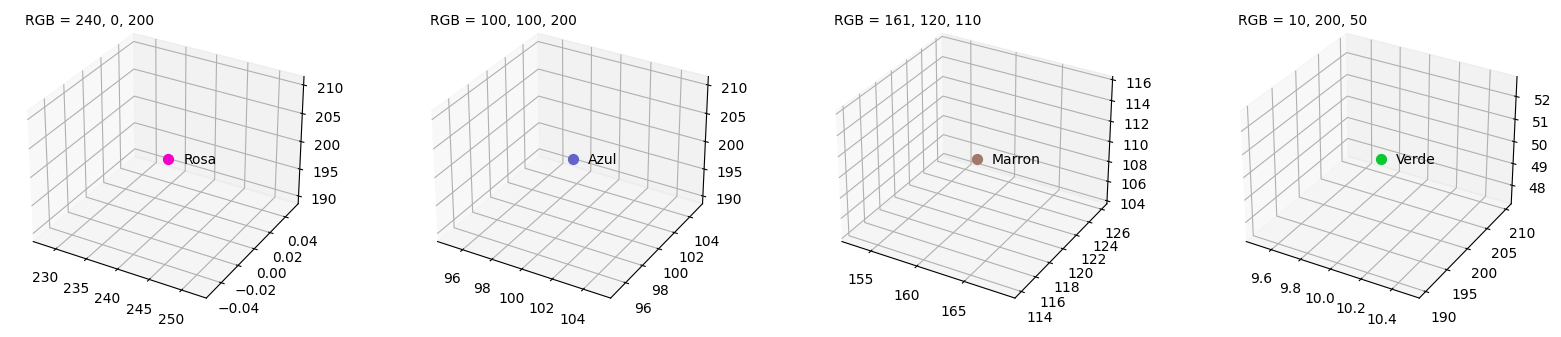

In [16]:
# %% prueba de un punto individual
def probar_color(modelo, binarizer, color, fig, pos, maxpos=4):
    R, G, B = color[0], color[1], color[2]  # selecciona color

    # pone en arreglo y escala  (NO OLVIDAR!)
    x_clr = np.array([[R, G, B]])
    x_clr = scaler.transform(x_clr)

    # clasifica el color para obtener el nombre
    y_clr = modelo.predict(x_clr)
    y_clr_name= binarizer.inverse_transform(y_clr)

    print('\nEl color con componentes RGB = (%d,%d,%d) es %s' % (R,G,B, y_clr_name[0]))

    # visualizacion del color en el espacio 3D
    ax = fig.add_subplot(1, maxpos, pos, projection='3d')

    ax.scatter(np.array([[R]]), np.array([[G]]), np.array([[B]]), c = np.array([[R,G,B]])/255.0, s=50 )

    ax.text(R*1.01, G, B, y_clr_name[0])
    ax.text2D(0.05, 0.95, f'RGB = {R}, {G}, {B}', transform=ax.transAxes)


fig = plt.figure(figsize=(20,4))
probar_color(modelo, binarizer, (240,   0, 200), fig, 1)
probar_color(modelo, binarizer, (100, 100, 200), fig, 2)
probar_color(modelo, binarizer, (161, 120, 110), fig, 3)
probar_color(modelo, binarizer, ( 10, 200,  50), fig, 4)
plt.show()